In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [6]:
# Load the first CSV into a DataFrame
df1 = pd.read_csv('application_record.csv')

# Load the second CSV into another DataFrame
df2 = pd.read_csv('credit_record.csv')

# Merge the two DataFrames on the 'ID' column
merged_df = pd.merge(df1, df2, on='ID')

# Reset the index of the merged DataFrame
merged_df.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [7]:
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [9]:
record_count = len(df1)
print(f"Number of records in the DataFrame: {record_count}")

record_count1 = len(df2)
print(f"Number of records in the DataFrame: {record_count1}")

record_count2 = len(merged_df)
print(f"Number of records in the DataFrame: {record_count2}")


Number of records in the DataFrame: 438557
Number of records in the DataFrame: 1048575
Number of records in the DataFrame: 777715


In [10]:
df_no_duplicates = merged_df.drop_duplicates()
df_no_duplicates.reset_index(drop=True, inplace=True)

In [11]:
record_count3 = len(df_no_duplicates)
print(f"Number of records in the DataFrame: {record_count3}")

Number of records in the DataFrame: 777715


In [12]:
# Preprocessing
# Drop rows with missing values (NaN)
df_no_duplicates.dropna(inplace=True)

record_count4 = len(df_no_duplicates)
print(f"Number of records in the DataFrame: {record_count3}")

Number of records in the DataFrame: 777715


In [13]:
df_no_duplicates.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,C
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,C
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,C
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4,C


In [14]:
df_no_duplicates.to_csv("merged.csv", index=False)

In [15]:
# Encode categorical columns
categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
encoder = LabelEncoder()
for column in categorical_columns:
    df_no_duplicates[column] = encoder.fit_transform(df_no_duplicates[column])

# Split the data into features and target
X = df_no_duplicates.drop(columns=['STATUS', 'ID'])  # Exclude 'STATUS' and 'ID' columns
y = df_no_duplicates['STATUS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the k-NN model
k = 3  # Choose the number of neighbors (k) as needed
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[39188   367     9     5     4    40 14948  5575]
 [ 1121   208    12     1     1     4   481   142]
 [   88    24     7     2     1     0    38    17]
 [   12     3    12     0     2     2    10     3]
 [   16     3     5     3     1     5     4     0]
 [   79     4     2     3     3   170    55    14]
 [16988   223    23     4    10    41 46118  4653]
 [ 9401   126    11     4     6    17  6396 14586]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62     60136
           1       0.22      0.11      0.14      1970
           2       0.09      0.04      0.05       177
           3       0.00      0.00      0.00        44
           4       0.04      0.03      0.03        37
           5       0.61      0.52      0.56       330
           C       0.68      0.68      0.68     68060
           X       0.58      0.48      0.53     30547

    accuracy                           0.62    161301
   macr

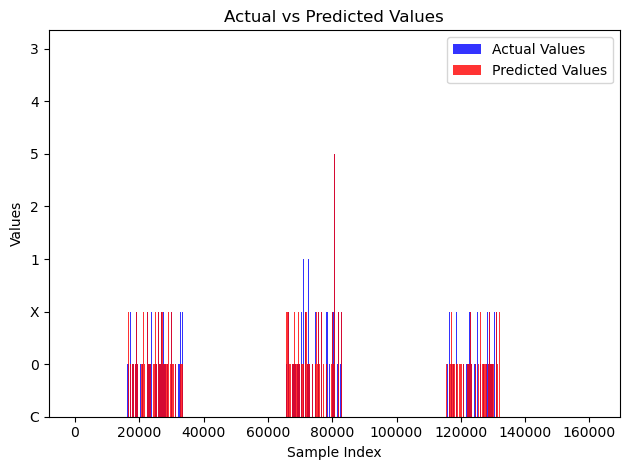

In [32]:
# Visualize the predictions
fig, ax = plt.subplots()
index = range(len(y_test))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, y_test, bar_width, alpha=opacity, color='b', label='Actual Values')
rects2 = plt.bar(index, y_pred, bar_width, alpha=opacity, color='r', label='Predicted Values')

plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
